In [1]:
import numpy as np

x = np.load("C:\ML stuff\\archive\X.npy")
y = np.load("C:\ML stuff\\archive\Y.npy")

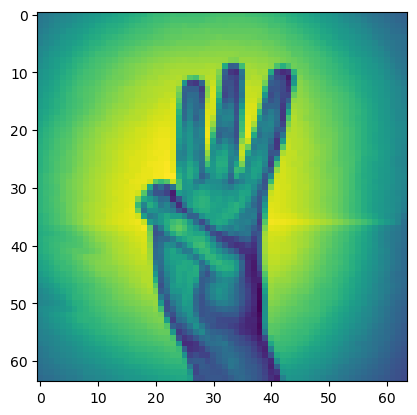

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x[778])


In [3]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2 ,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1649, 64, 64) (413, 64, 64)
(1649, 10) (413, 10)


In [4]:
x_train = x_train.reshape( -1 , 64 , 64 , 1 )
x_test = x_test.reshape( -1, 64 , 64 , 1 )

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1649, 64, 64, 1) (413, 64, 64, 1)
(1649, 10) (413, 10)


In [18]:
import tensorflow as tf 
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten , Conv2D , MaxPooling2D,Dropout

model = keras.Sequential([
    keras.Input(shape=(64,64,1)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),  # Adjusted pooling size

    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


model.fit(x_train,y_train,epochs=50,verbose=2)
model.evaluate(x_test,y_test, verbose=2)

Epoch 1/50
52/52 - 3s - loss: 2.3045 - accuracy: 0.1001 - 3s/epoch - 55ms/step
Epoch 2/50
52/52 - 2s - loss: 1.9497 - accuracy: 0.3002 - 2s/epoch - 38ms/step
Epoch 3/50
52/52 - 2s - loss: 0.8654 - accuracy: 0.7022 - 2s/epoch - 38ms/step
Epoch 4/50
52/52 - 2s - loss: 0.4199 - accuracy: 0.8623 - 2s/epoch - 39ms/step
Epoch 5/50
52/52 - 2s - loss: 0.2627 - accuracy: 0.9266 - 2s/epoch - 38ms/step
Epoch 6/50
52/52 - 2s - loss: 0.1656 - accuracy: 0.9442 - 2s/epoch - 39ms/step
Epoch 7/50
52/52 - 2s - loss: 0.1156 - accuracy: 0.9624 - 2s/epoch - 38ms/step
Epoch 8/50
52/52 - 2s - loss: 0.0666 - accuracy: 0.9818 - 2s/epoch - 37ms/step
Epoch 9/50
52/52 - 2s - loss: 0.0436 - accuracy: 0.9867 - 2s/epoch - 38ms/step
Epoch 10/50
52/52 - 2s - loss: 0.0249 - accuracy: 0.9933 - 2s/epoch - 37ms/step
Epoch 11/50
52/52 - 2s - loss: 0.0585 - accuracy: 0.9812 - 2s/epoch - 38ms/step
Epoch 12/50
52/52 - 2s - loss: 0.0714 - accuracy: 0.9812 - 2s/epoch - 38ms/step
Epoch 13/50
52/52 - 2s - loss: 0.0297 - accuracy:

[0.15956193208694458, 0.9685230255126953]

In [19]:
model.save("sign")

INFO:tensorflow:Assets written to: sign\assets


INFO:tensorflow:Assets written to: sign\assets
